# Deep learning from scratch: homework 2

Shixuan Guo 3146754 Homework2

### General instructions

Complete the exercises listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells.

#### <span style="color:#a50e3e;">Exercise 1. </span>   Perform two-class classification on a toy dataset

Code up the two-class logistic regression / softmax cost function, using gradient descent to minimize.  You should use the two class toy dataset in the file called *3d_classification_data_v2.csv*.

Create a plot with two panels that shows the number of misclassifications at each gradient descent step (in the left panel), and one that compares the cost function at each gradient descent step (in the right panel).  You won't get perfect separation - but you should be able to separate most of the points.

In [1]:
import matplotlib.pyplot as plt

In [2]:
import autograd.numpy as np

In [3]:
from autograd import grad   

In [4]:
# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w):
    # compute the gradient of our input function - note this is a function too!
    gradient = grad(g)

    # run the gradient descent loop
    best_w = w # weight we return, should be the one providing lowest evaluation
    whistory = []
    whistory.append(w)
    best_eval = g(w)       # lowest evaluation yet
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        whistory.append(w)
        # return only the weight providing the lowest evaluation
        test_eval = g(w)
        if test_eval < best_eval:
            best_eval = test_eval
            best_w = w
            
    return whistory

In [5]:
csvname = '3d_classification_data_v2.csv'
data = np.loadtxt(csvname,delimiter = ',')

In [6]:
x = data[:,:-1]
y = data[:,-1]

In [41]:
def model(x,w):
    a = w[0] + np.dot(x,w[1:])
    return a.T

In [13]:
# the convex softmax cost function
def softmax(w):
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))
    return cost/float(np.size(y))

In [5]:
# cost function history plotter
def cost_history(weight_history,g):
    # loop over weight history and compute associated cost function history at each step
    cost_his = []
    for i in weight_history:
        cost_his.append(g(i))     
    # plot cost function history
    plt.plot(cost_his)
    plt.title('softmax cost')
 

In [69]:
w = np.ones((3,1))

In [70]:
weight_history = gradient_descent(g = softmax,alpha = 1,max_its = 800,w = w)

In [86]:
#compute the number of misclassifications
def mis_number(weight_history):
    mis_num = []
    for i in weight_history:
        misnum = 0
        y_p = model(x,i)
        for p in range(len(y_p[0])):
            if y_p[0][p] > 0:
                y_p[0][p] = 1
            if y_p[0][p] < 0:
                y_p[0][p] = -1
        
        for j in range(len(y)):
            if y_p[0][j]!=y[j]:
                misnum = misnum +1
        mis_num.append(misnum)
    #print(mis_num[-1])
    plt.plot(mis_num)
    plt.title('number of misclassifications')
    plt.show()
    return mis_num[-1]

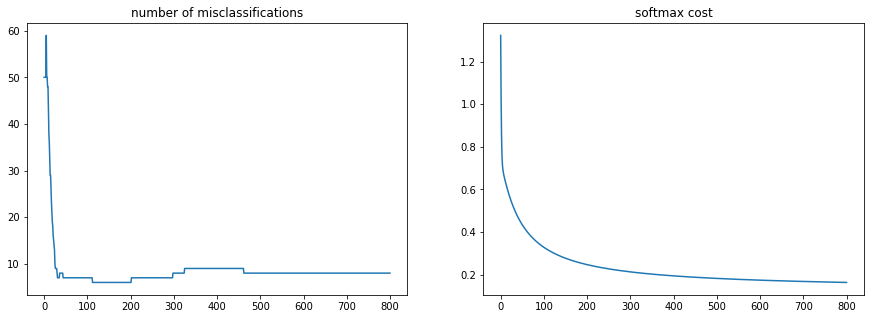

In [72]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
cost_history(weight_history,g=softmax)
plt.subplot(1,2,1)
mis_number(weight_history)

#### <span style="color:#a50e3e;">Exercise 2. </span>   Perform two-class classification on a breast cancer dataset

Use the softmax cost function to classify healthy from cancerous tissue using the dataset located in breast_cancer_dataset.csv (included in this homework folder).  You can examine the description of this dataset [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). 

There are $N = 8$ input dimensions to the input of this dataset (these are the first $N = 8$ columns of the breast_cancer_dataset.csv, the last column are the associated labels).  Fit using gradient descent using a maximum of 5,000 iterations.  You should be able to reach a point on the surface where you misclassify less than 30 examples.

**Note:** Python is a great prototyping language but [it is slow](http://jakevdp.github.io/blog/2014/05/09/why-python-is-slow/), particular when evaluating explicit for loops.  If you are having speed issues try re-writing the softmax cost function using as few explicit for-loops as possible (you can indeed write the entire summation in a single line of Python code, for-loop free).

In [74]:
csvname = 'breast_cancer_data.csv'
data = np.loadtxt(csvname,delimiter = ',')

In [75]:
x = data[:,:-1]
y = data[:,-1]

In [76]:
w = np.ones((9,1))

In [79]:
weight_history = gradient_descent(g = softmax,alpha = 0.1,max_its = 5000,w = w)

27


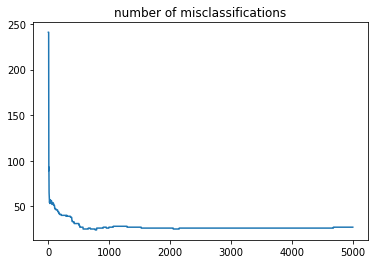

27

In [87]:
mis_number(weight_history)

so we reach a point where the number of misclassification is 27, less than 30.

#### <span style="color:#a50e3e;">Exercise 3. </span>   Code up One-versus-All multiclass classification

Using the toy $C = 3$ class dataset located in *3class_data.csv* - code up One-Versus-All classification, using this toy dataset to test out your code.  You should be able to learn a model that perfectly separates this data - as shown in class.  You may use your softmax cost / gradient descent code here for each of the two-class subproblems! 

In [29]:
csvname = '3class_data.csv'
data = np.loadtxt(csvname,delimiter = ',')

In [30]:
x = data[:,:-1]
y_p = data[:,-1]

In [33]:
w_j = []
for j in range(3):
    y = np.copy(y_p)
    for i in range(len(y)):
        if y[i] == (j+1):
            y[i]=1
        else:
            y[i]=-1
    w = np.ones((3,1))
    weight_history = gradient_descent(g = softmax,alpha = 0.1,max_its = 5000,w = w)
    weight = weight_history[-1]
    weight = weight*(1/np.linalg.norm(weight))
    w_j.append(weight)
   # w_j = w_j[0]
   # w_i = []
    #w_i.append(w_j[0][0])
    #w_i.append(w_j[1][0])
   # w_i.append(w_j[2][0])

In [34]:
print(w_j)

[array([[-0.06919637],
       [-0.7869175 ],
       [ 0.61316614]]), array([[-0.58586089],
       [ 0.76186778],
       [ 0.27626889]]), array([[ 0.3899924 ],
       [-0.10065734],
       [-0.91529997]])]


In [35]:
np.reshape(w_j,(3,3))


array([[-0.06919637, -0.7869175 ,  0.61316614],
       [-0.58586089,  0.76186778,  0.27626889],
       [ 0.3899924 , -0.10065734, -0.91529997]])

In [36]:
w_i = w_j
w_i = np.array(w_i).T[0]
print(w_i)

[[-0.06919637 -0.58586089  0.3899924 ]
 [-0.7869175   0.76186778 -0.10065734]
 [ 0.61316614  0.27626889 -0.91529997]]


In [37]:
# compute C linear combinations of input point, one per classifier
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

In [38]:
# the fusion rule
def fusion_rule(x,w):
    return np.argmax(model(x,w))

In [39]:
def mis_number(w_j):
    misnum = 0
    y_h = []
    for i in x:
        y_h.append(fusion_rule(i,w_j))
    for p in range(len(y_h)):
        if y_h[p] != y_p[p]-1:
            misnum = misnum+1
        else:
            misnum = misnum

    return misnum

In [40]:
mis_number(w_i)

0

#### <span style="color:#a50e3e;">Exercise 4. </span>   A nonlinear two-class dataset

Propose a nonlinear feature transformation and integrate it into your two-class classification scheme in order to adequately classify the dataset shown below - located in the file *bricks.csv'.  With the right transformation you should be able to classify this quite well.

<p>
  <img src= 'brick_pick.png' width="40%" height="40%" alt=""/>
</p>

In [6]:
csvname = 'bricks.csv'
data4 = np.loadtxt(csvname,delimiter = ',')

In [7]:
x = data4[:,:-1]
y = data4[:,-1]

In [8]:
# the feature transformation 
def feature_transforms_2(x,w):
    # calculate feature transform
    f = np.sin(w[0] + x*w[1])
    return f

In [9]:
# the feature transformation 
def feature_transforms_1(x,w):
    # calculate feature transform
    f = w[0] + x*w[1]
    return f

In [10]:
# an implementation of our model employing a nonlinear feature transformation
def model(x,w):    
    # feature transformation 
    #f1 = feature_transforms_1(x[:,0],w[0])
    #f2 = feature_transforms_2(x[:,1],w[1])
    
    # compute linear combination and return
    #a = f1.T*w[2][0] + f2.T*w[2][1]
    a = w[0] + w[1]*x[:,0]+w[2]*x[:,1]**3+w[3]*x[:,1]**2+w[4]*x[:,1]+w[5]*x[:,1]
    return a.T

In [11]:
w = np.ones((6,1))

In [14]:
weight_history = gradient_descent(g = softmax,alpha = 1,max_its = 500,w = w)

In [15]:
#compute the number of misclassifications
def mis_number(weight_history):
    mis_num = []
    for i in weight_history:
        misnum = 0
        y_p = model(x,i)
        for p in range(len(y_p)):
            if y_p[p] > 0:
                y_p[p] = 1
            else:
                y_p[p] = -1
        
        for j in range(len(y)):
            if y_p[j]!=y[j]:
                misnum = misnum +1
        mis_num.append(misnum)
    #print(mis_num[-1])
    plt.plot(mis_num)
    plt.title('number of misclassifications')
    plt.show()
    return mis_num[-1]

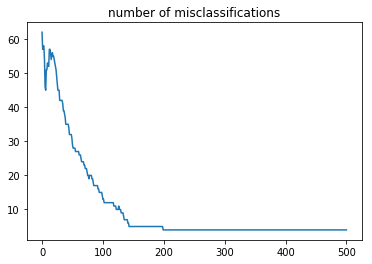

4

In [16]:
mis_number(weight_history)

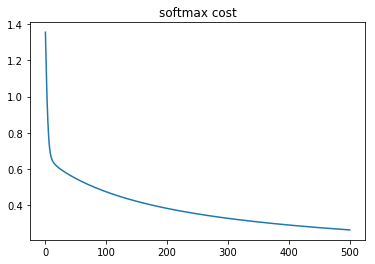

In [17]:
cost_history(weight_history,g=softmax)
plt.show()